<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-por-Refuerzo/blob/main/Notebooks/Estrategia_Exploraci%C3%B3nExplotaci%C3%B3n_Multi_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas y Funciones


In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def entorno_multi_armed_bandit(maquinas):
    '''
    Creamos el entorno para el problema "multi_armed_bandit" generando aleatoriamente
    la distribución de probabilidad de los premios que otorga cada máquina
    '''
    premio_medio = np.random.uniform(-10, 5, size=maquinas)
    desv_estandar = np.random.uniform(0, 5, size=maquinas)
    return premio_medio, desv_estandar

In [48]:
def init_Q(maquinas):
  '''Inicializa el vector Q en ceros, el vector Q representa el valor esperado
   de recompensa de cada máquina'''
  Q =np.zeros(shape=(1, maquinas))
  return Q

In [49]:
def selecciona_maquina_exploracion(maquinas):
    '''Selecciona una máquina aleatoriamente con distribución unifome'''
    selec = np.random.choice(range(maquinas))
    return selec

In [60]:
def selecciona_maquina_epsilon_greedy (maquinas):
    '''Selecciona la máquina con el máximo valor de la ganancia esperada'''
    p = np.random.uniform(0,1)
    ε = 0.02

    if p < (1 - ε):
        selec = np.argmax(Q[0])
        return selec


    else:
        selec = np.random.choice(range(maquinas))
        return selec
    return selec

In [51]:
def selecciona_maquina_egd(maquinas, ε):
    '''Selecciona una máquina con la estrategia epsilon decreasing greedy'''
    p = np.random.uniform(0,1)

    # cuándo epsilon es pequeño, generalmente se escoge la máquina con mayor ganancia
    if p < (1 - ε):
        selec = np.argmax(Q[0])
        return selec

    # cuando epsilon es grande, generalmente se escoge una al azar
    else:
        selec = np.random.choice(range(maquinas))
        return selec

In [52]:
def calcula_recompensa(selec):
  '''Calcula la recompensa de jugar en una determinada máquina'''
  r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1)[0])
  return r

In [53]:
def actualiza_Q (Q, selec, r, veces_maq):
    '''Actualiza el valor esperados de recompensa de la máquina seleccionada'''
    Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])
    return Q

# Introducción

## Definimos nuestro entorno

In [13]:
### Creamos el entorno definiendo el comportamiento de cada máquina

premio_medio  = np.array([1,  2,  3, -10])
desv_estandar = np.array([1, 4, 5,  1])

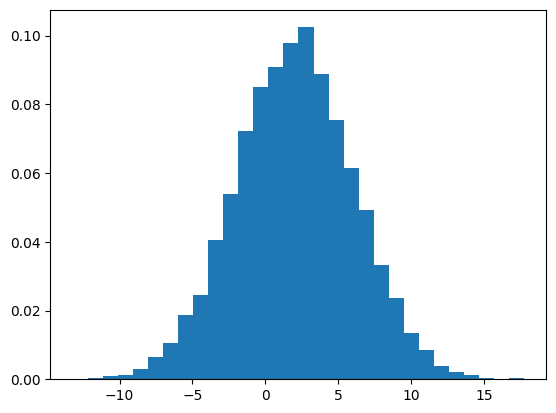


La máquina arrojo durante los primeras 10 jugadas los siguientes premios: 

[ 0.72436394  3.30692869  3.69855323 -8.4039401   2.00803673  7.88715973
  4.07893134  4.81108137  1.34435041  6.91848006]


In [14]:
maquina = 1
n = 10000
#  r es el premio aleatorio que va a dar una máquina (dada su distribución)
r = np.random.normal(premio_medio[maquina], desv_estandar[maquina],n)
plt.hist(r, bins=30, density=True)
plt.show()
print('\nLa máquina arrojo durante los primeras 10 jugadas los siguientes premios: \n')
print (r[0:10])

## ¿Que hace un jugador en el casino?

* inicializamos en cero la variable que guardará los premios o perdidas acumuladas

In [15]:
premio_acumulado = 0

* seleccionamos una de las maquinas,
* jugamos en ella y obtenemos la recompensa (o pérdida)
* se suma la recompensa o perdida al total acumulado

In [16]:
# 1) Se selecciona una máquina.
selec = 1

# 2) Jugamos en la máquina seleccionada y se obtiene una recompensa o pérdida.
r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1)[0])

# 3) Se suma al premio acumulado.
premio_acumulado += r
print('recompensa (r):', r)
print('Premio acumulado:', premio_acumulado)

recompensa (r): 10
Premio acumulado: 10


##  ¿Cómo guardamos la información de los premios obtenidos de cada máquina?

<center>Promedio Incremental

$$Q =  Q_{n-1}+\frac{1}{n} (r_n - Q_{n-1})$$

In [17]:
# Inicializa el vector Q en ceros, donde guardaremos la información de cada máquina.
n_maquinas = 4
Q = np.zeros(shape=(1, n_maquinas))
Q

array([[0., 0., 0., 0.]])

In [18]:
# Vamos a jugar cierto número de veces (episodios).
episodios = 200

# Inicializamos el vector Q y la variable "premio acumulado".
Q = np.zeros(shape =(1, n_maquinas))
premio_acumulado = 0

# Inicializamos un vector que guardará las veces que se va jugando en cada máquina.
n_maquinas = 4
veces_maq = np.zeros(n_maquinas)

# Creamos un ciclo de juego y aprendizaje.
for ep in range(1, episodios+1):
      # 1) Se selecciona una máquina, de manera aleatoria, distribución uniforme.
      selec = np.random.choice([0, 1, 2, 3])

      # 2) Jugamos en la máquina seleccionada y se obtiene una recompensa o pérdida
      r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1)[0])

      # 3) Se suma la recompensa o pérdida obtenida al premio acumulado
      premio_acumulado += r

      # 5) Actualizamos la información con el premio o castigo obtenido en la máquina seleccionada
      veces_maq[selec] += 1 # Actualizamos las veces que se ha jugado en la máquina seleccionada
      Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])

#       # 6) Reportamos el progreso del aprendizaje.
#       print(f'Episodio {ep},   Máquina {selec},   Premio = {r},   \
# Premio_acumulado = {premio_acumulado},    Q = {Q.round(2)} \n')

print(f'Premio_acumulado = {premio_acumulado},   Q = {Q.round(2)}')

Premio_acumulado = -151,   Q = [[ 0.88  2.39  3.76 -9.48]]


¿Sería correcto si, en lugar de escojer la máquina de forma aleatoria, escojemos la que más rendimientos ha dado?

In [19]:
selec = np.argmax(Q[0])  # Selección usando la estrategia de explotación.
selec

np.int64(2)

¿Podemos pensar en una estrategia combinada?

In [20]:
p = np.random.uniform(0, 1)  # Obtenemos un valor entre 0 y 1.
ε = .99 # Valor que disminuye desde 1 hasta 0 según avance el aprendizaje.

print(f'p = {p}, ε = {ε}')
print(f'¿Es p menor que 1 - ε?  {p < (1 - ε)}')
if p < (1 - ε):
    print('Explotación')
    selec = np.argmax(Q[0])
else:
    # Exploración
    print('Exploración')
    selec = np.random.choice(range(n_maquinas))
print(f'Máquina seleccionada: {selec}')

p = 0.6859239403983153, ε = 0.99
¿Es p menor que 1 - ε?  False
Exploración
Máquina seleccionada: 2


In [21]:
p = np.random.uniform(0, 1)  # Obtenemos un valor entre 0 y 1.
ε = 0.01 # Valor que disminuye desde 1 hasta 0 según avance el aprendizaje.

print(f'p = {p}, ε = {ε}')
print(f'¿Es p menor que 1 - ε?  {p < (1 - ε)}')
if p < (1 - ε):
    print('Explotación')
    selec = np.argmax(Q[0])
else:
    # Exploración
    print('Exploración')
    selec = np.random.choice(range(n_maquinas))
print(f'Máquina seleccionada: {selec}')

p = 0.26074970861384705, ε = 0.01
¿Es p menor que 1 - ε?  True
Explotación
Máquina seleccionada: 2


Vamos a calcular  ε en función de los episodios, de manera decreciente


In [22]:
episodios = 200
epsilon_vec = np.exp(-5*np.linspace(0, 1, episodios))
epsilon_vec

array([1.        , 0.97518739, 0.95099045, 0.9273939 , 0.90438284,
       0.88194274, 0.86005945, 0.83871913, 0.81790832, 0.79761388,
       0.777823  , 0.75852319, 0.73970225, 0.72134831, 0.70344978,
       0.68599536, 0.66897402, 0.65237503, 0.63618791, 0.62040243,
       0.60500863, 0.58999679, 0.57535743, 0.56108131, 0.54715942,
       0.53358297, 0.52034338, 0.50743231, 0.49484159, 0.48256328,
       0.47058963, 0.45891307, 0.44752624, 0.43642195, 0.42559318,
       0.41503311, 0.40473505, 0.39469252, 0.38489917, 0.37534882,
       0.36603544, 0.35695314, 0.34809621, 0.33945903, 0.33103617,
       0.3228223 , 0.31481224, 0.30700092, 0.29938343, 0.29195495,
       0.28471078, 0.27764637, 0.27075724, 0.26403904, 0.25748755,
       0.25109861, 0.2448682 , 0.23879238, 0.23286732, 0.22708927,
       0.2214546 , 0.21595973, 0.21060121, 0.20537564, 0.20027974,
       0.19531028, 0.19046412, 0.18573821, 0.18112956, 0.17663526,
       0.17225248, 0.16797845, 0.16381046, 0.1597459 , 0.15578

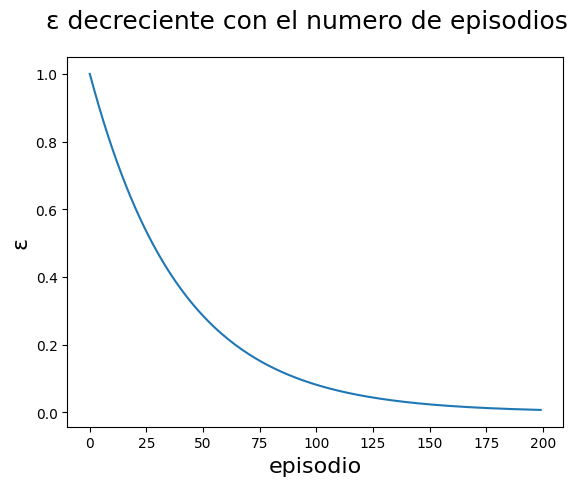

In [23]:
fig =plt.figure()
plt.plot(epsilon_vec)
plt.xlabel('episodio', fontsize=16)
plt.ylabel('ε', fontsize=16)
fig.suptitle('ε decreciente con el numero de episodios', fontsize=18)

plt.show()

# Aprendizaje con distintas estrategias

In [ ]:
# ### Definimos el número de máquinas o brazos del problema
# n_maquinas = 3

# ### Creamos el entorno
# np.random.seed(28)
# premio_medio, desv_estandar = entorno_multi_armed_bandit(n_maquinas)  # inicializa la distribución de probabilidad de cada máquina
### Definimos el número de episodios (juegos)
episodios = 10000

## Exploración

In [61]:
# Inicializamos el vector Q, la variable "premio acumulado" y el vector veces_maq.
Q = init_Q(n_maquinas)
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)

# Creamos un ciclo de juego y aprendizaje con estrategia de exploración.
for episodio in range(1,episodios+1):
    selec = selecciona_maquina_exploracion(n_maquinas)
    veces_maq[selec] += 1
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    premio_acumulado += r

print(f"El premio acumulado es de: ${premio_acumulado:,.2f}".replace('$-', '-$'))

El premio acumulado es de: -$238.00


In [25]:
Q

array([[ 0.734375  ,  0.98      ,  2.46808511, -9.33333333]])

## Epsilon greedy

In [68]:
# Inicializamos el vector Q, la variable "premio acumulado" y el vector veces_maq.
Q = init_Q(n_maquinas)
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)

# Creamos un ciclo para jugar en cada máquina
for episodio in range(1, 6):
    selec = selecciona_maquina_exploracion(n_maquinas)
    r = calcula_recompensa(selec)
    premio_acumulado += r
    veces_maq[selec] += 1
    Q = actualiza_Q(Q, selec, r, veces_maq)

# El resto de los episodios jugamos con una estrategia codiciosa (explotación).
for episodio in range(5 ,episodios+1):
    selec = selecciona_maquina_epsilon_greedy(n_maquinas)
    r = calcula_recompensa(selec)
    premio_acumulado += r
    veces_maq[selec] += 1
    Q = actualiza_Q(Q, selec, r, veces_maq)

print(f"El premio acumulado es de: ${premio_acumulado:,.2f}".replace('$-', '-$'))

El premio acumulado es de: $169.00


In [31]:
Q

array([[ 1.        ,  1.63157895,  2.35714286, -9.        ]])

## Epsilon decreasing greedy (edg)

In [59]:
# Inicializamos el vector Q, la variable "premio acumulado" y el vector veces_maq.
Q = init_Q(n_maquinas)
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)

# Creamos el vector con un epsilon para cada episodio.
epsilon_vec = np.exp(-5 * np.linspace(0, 1, episodios))

# Creamos un ciclo de juego y aprendizaje con estrategia edg
for episodio in range(1 ,episodios+1):
    ε = epsilon_vec[episodio-1]  # Epsilon decreciente.
    selec = selecciona_maquina_egd(n_maquinas, ε)
    r = calcula_recompensa(selec)
    premio_acumulado += r
    veces_maq[selec] += 1
    Q = actualiza_Q(Q, selec, r, veces_maq)

print(f"El premio acumulado es de: ${premio_acumulado:,.2f}".replace('$-', '-$'))

El premio acumulado es de: $490.00


In [ ]:
Q

array([[ 0.63636364,  1.63116371,  2.68808962, -9.53648915]])

# Referencias:

[1]A. Aristizabal, «Understanding Reinforcement Learning Hands-On: Multi-Armed Bandits», Medium, oct. 19, 2020. https://towardsdatascience.com/understanding-reinforcement-learning-hands-on-part-2-multi-armed-bandits-526592072bdc (accedido jul. 30, 2021).

